In [2]:

# Glacial Lake Detection Using U-Net (Mock Data)

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import os

# ---- Load Image and Mask ----
img = np.array(Image.open("mock_s2_image.png")) / 255.0
mask = np.array(Image.open("mock_lake_mask.png")) / 255.0
mask = (mask > 0.5).astype(np.float32)

img_tensor = torch.tensor(img.transpose(2, 0, 1), dtype=torch.float32).unsqueeze(0)
mask_tensor = torch.tensor(mask, dtype=torch.float32).unsqueeze(0).unsqueeze(0)

# ---- U-Net Architecture ----
class DoubleConv(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.double_conv = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, 3, padding=1), nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, 3, padding=1), nn.ReLU(inplace=True)
        )
    def forward(self, x): return self.double_conv(x)

class UNet(nn.Module):
    def __init__(self, in_channels=3, out_channels=1):
        super().__init__()
        self.enc1 = DoubleConv(in_channels, 64)
        self.enc2 = DoubleConv(64, 128)
        self.enc3 = DoubleConv(128, 256)
        self.pool = nn.MaxPool2d(2)
        self.middle = DoubleConv(256, 512)
        self.up3 = nn.ConvTranspose2d(512, 256, 2, stride=2)
        self.dec3 = DoubleConv(512, 256)
        self.up2 = nn.ConvTranspose2d(256, 128, 2, stride=2)
        self.dec2 = DoubleConv(256, 128)
        self.up1 = nn.ConvTranspose2d(128, 64, 2, stride=2)
        self.dec1 = DoubleConv(128, 64)
        self.out_conv = nn.Conv2d(64, out_channels, 1)
    def forward(self, x):
        e1 = self.enc1(x)
        e2 = self.enc2(self.pool(e1))
        e3 = self.enc3(self.pool(e2))
        m = self.middle(self.pool(e3))
        d3 = self.dec3(torch.cat([self.up3(m), e3], dim=1))
        d2 = self.dec2(torch.cat([self.up2(d3), e2], dim=1))
        d1 = self.dec1(torch.cat([self.up1(d2), e1], dim=1))
        return torch.sigmoid(self.out_conv(d1))

# ---- Train on the mock data ----
model = UNet()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
loss_fn = nn.BCELoss()

epochs = 100
for epoch in range(epochs):
    model.train()
    pred = model(img_tensor)
    loss = loss_fn(pred, mask_tensor)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 10 == 0:
        print(f"Epoch {epoch}: Loss = {loss.item():.4f}")

# ---- Predict and Plot ----
model.eval()
with torch.no_grad():
    output = model(img_tensor)[0, 0].numpy()

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title("Input Image")
plt.axis("off")
plt.subplot(1, 3, 2)
plt.imshow(mask, cmap="gray")
plt.title("Ground Truth Mask")
plt.axis("off")
plt.subplot(1, 3, 3)
plt.imshow(output > 0.5, cmap="gray")
plt.title("Predicted Mask")
plt.axis("off")
plt.tight_layout()
plt.show()


ModuleNotFoundError: No module named 'matplotlib'

In [3]:
!pip install matplotlib pillow numpy


   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------- ----------------------- 3.4/8.1 MB 18.4 MB/s eta 0:00:01
   ------------------------------------- -- 7.6/8.1 MB 19.6 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 17.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 18.0 MB/s eta 0:00:00

   ------------- -------------------------- 2/6 [fonttools]
   ------------- -------------------------- 2/6 [fonttools]
   ------------- -------------------------- 2/6 [fonttools]
   ------------- -------------------------- 2/6 [fonttools]
   ------------- -------------------------- 2/6 [fonttools]
   ------------- -------------------------- 2/6 [fonttools]
   ------------- -------------------------- 2/6 [fonttools]
   ------------- -------------------------- 2/6 [fonttools]
   ------------- -------------------------- 2/6 [fonttools]
   ----------

In [5]:
import matplotlib.pyplot as plt


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import torch
import torch.nn as nn
import torch.nn.functional as F


In [8]:
# ---- Load Mock Image and Mask ----
img = np.array(Image.open("mock_lake_mask.png")) / 255.0
mask = (img > 0.5).astype(np.float32)

img_tensor = torch.tensor(img.transpose(2, 0, 1), dtype=torch.float32).unsqueeze(0)
mask_tensor = torch.tensor(mask, dtype=torch.float32).unsqueeze(0).unsqueeze(0)


FileNotFoundError: [Errno 2] No such file or directory: 'mock_lake_mask.png'

In [11]:
# ---- Create Mock Image and Mask ----
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Create a 64x64 RGB mock image with a fake glacial lake region
img = np.zeros((64, 64, 3), dtype=np.uint8)
img[20:45, 25:50] = [0, 100, 255]  # Blue patch simulating glacial lake

# Create a binary mask where the lake is located
mask = np.zeros((64, 64), dtype=np.float32)
mask[20:45, 25:50] = 1.0  # Same region as lake

# Convert to tensors for model
import torch
img_tensor = torch.tensor(img.transpose(2, 0, 1), dtype=torch.float32).unsqueeze(0) / 255.0
mask_tensor = torch.tensor(mask, dtype=torch.float32).unsqueeze(0).unsqueeze(0)


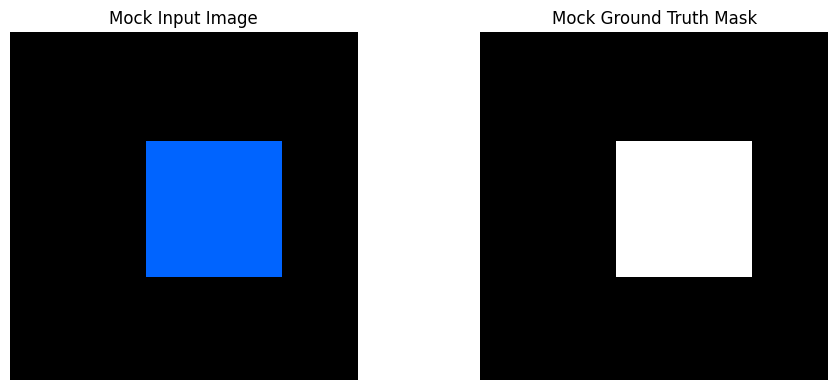

In [12]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import torch

# ---- Generate a 64x64 RGB mock image with a simulated glacial lake ----
img = np.zeros((64, 64, 3), dtype=np.uint8)
img[20:45, 25:50] = [0, 100, 255]  # Blue patch simulating a glacial lake

# ---- Create a mask for the same region ----
mask = np.zeros((64, 64), dtype=np.float32)
mask[20:45, 25:50] = 1.0  # The lake region in white

# ---- Convert image and mask to tensors ----
img_tensor = torch.tensor(img.transpose(2, 0, 1), dtype=torch.float32).unsqueeze(0) / 255.0
mask_tensor = torch.tensor(mask, dtype=torch.float32).unsqueeze(0).unsqueeze(0)

# ---- Show image and mask ----
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Mock Input Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(mask, cmap='gray')
plt.title("Mock Ground Truth Mask")
plt.axis("off")

plt.tight_layout()
plt.show()


In [15]:
import torch.nn as nn
import torch.nn.functional as F

class DoubleConv(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.double_conv = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, 3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, 3, padding=1),
            nn.ReLU(inplace=True)
        )

    def forward(self, x):
        return self.double_conv(x)

class UNet(nn.Module):
    def __init__(self, in_channels=3, out_channels=1):
        super().__init__()
        self.enc1 = DoubleConv(in_channels, 16)
        self.enc2 = DoubleConv(16, 32)
        self.pool = nn.MaxPool2d(2)
        self.up = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)
        self.dec1 = DoubleConv(32 + 16, 16)
        self.final = nn.Conv2d(16, out_channels, 1)

    def forward(self, x):
        e1 = self.enc1(x)
        e2 = self.enc2(self.pool(e1))
        d1 = self.up(e2)
        d1 = torch.cat([d1, e1], dim=1)
        d1 = self.dec1(d1)
        return torch.sigmoid(self.final(d1))


In [16]:
model = UNet()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = nn.BCELoss()

# Simple 100-epoch training
for epoch in range(100):
    model.train()
    optimizer.zero_grad()
    output = model(img_tensor)
    loss = criterion(output, mask_tensor)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 20 == 0:
        print(f"Epoch {epoch+1}/100 - Loss: {loss.item():.4f}")


Epoch 20/100 - Loss: 0.0349
Epoch 40/100 - Loss: 0.0159
Epoch 60/100 - Loss: 0.0021
Epoch 80/100 - Loss: 0.0005
Epoch 100/100 - Loss: 0.0001


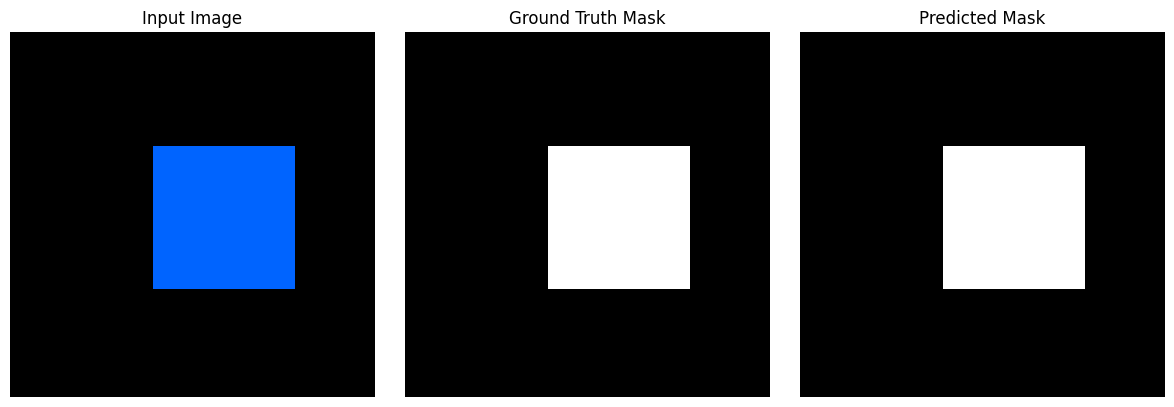

In [17]:
model.eval()
with torch.no_grad():
    output = model(img_tensor)[0, 0].numpy()

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title("Input Image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(mask.squeeze(), cmap="gray")
plt.title("Ground Truth Mask")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(output > 0.5, cmap="gray")
plt.title("Predicted Mask")
plt.axis("off")

plt.tight_layout()
plt.show()
